<a href="https://colab.research.google.com/github/johntorfi/insurance_premium/blob/main/InsurancePremium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Insurance Premium Prediction
 ## Project description
### This project focuses on insurance premium prediction using a dataset obtained from Kaggle(https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction). The dataset contains information about various factors that influence insurance premiums, such as age, gender, body mass index (BMI), number of children, smoking habits, and region. The goal is to develop a predictive model that can accurately estimate insurance premiums based on these factors.
### The Jupyter notebook accompanying this project will provide a step-by-step explanation of the data analysis and modeling process. It will include code snippets, visualizations, and explanations to make the implementation and results clear and understandable.
### By the end of this project, we aim to have a well-performing predictive model for insurance premium estimation, which can be used as a tool for insurance companies to make informed decisions and enhance their pricing strategies.



In [1]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tabulate import tabulate
from operator import add
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
insurance_df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# 1- Data exploratory analysis
We will use various techniques and steps to gain insights and understanding about the dataset.

## Data Summary

In [4]:
insurance_df.shape

(1338, 7)

In [5]:
insurance_df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## 2-Data analysis and visualization

### The pairplot, provides a quick overview of all variables. It helps identify potential correlations, patterns, or outliers in the dataset.

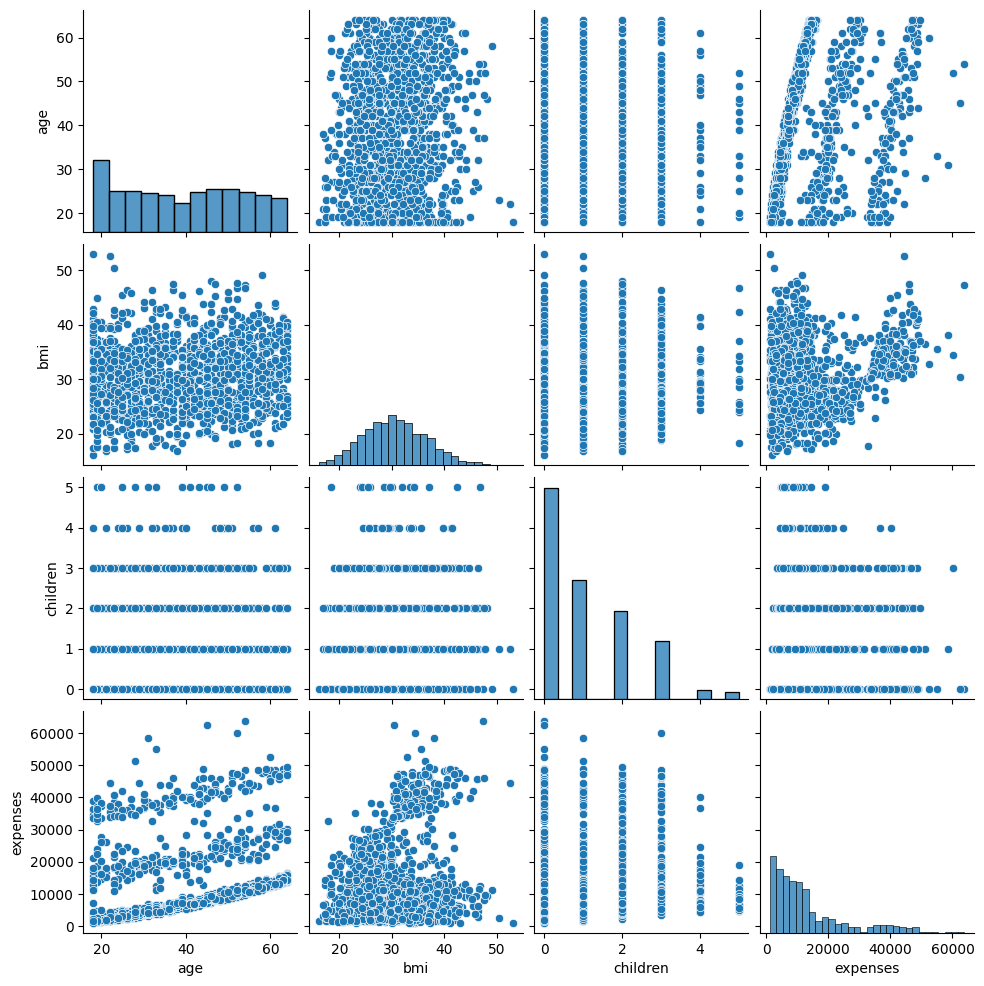

In [7]:
sns.pairplot(insurance_df) 

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

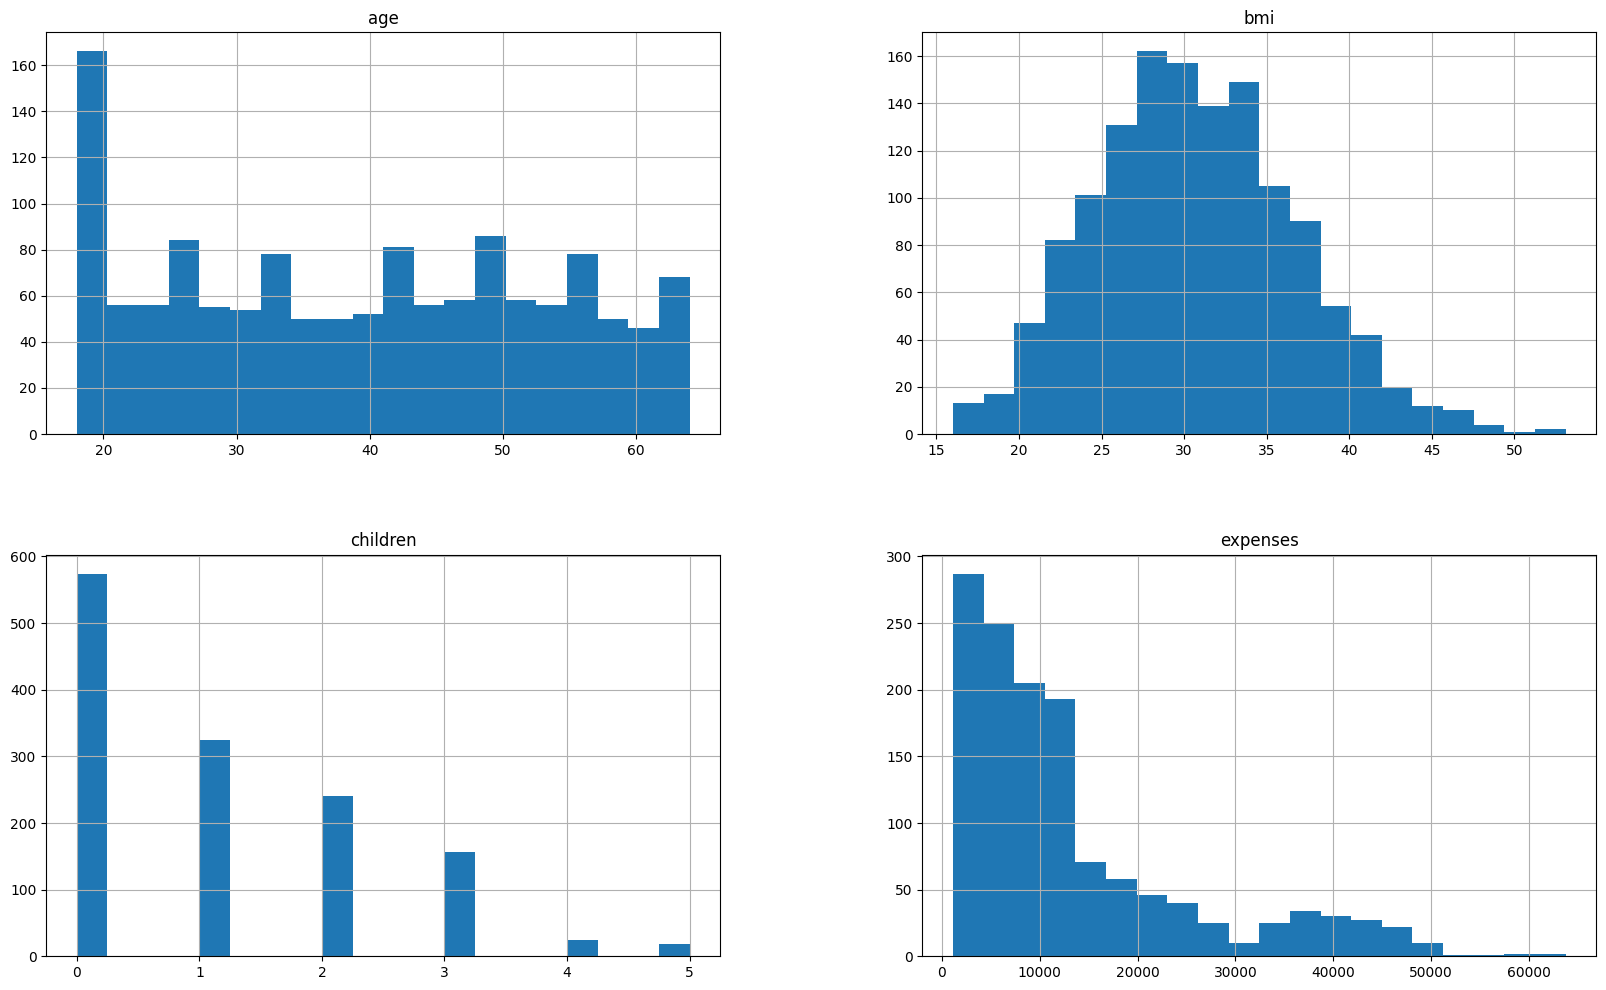

In [8]:
insurance_df.hist(figsize=(20,12),bins=20)

## Univariate Analysis:
Here we analyzing each variable individually to understand its distribution, range, central tendency, and any outliers or anomalies. 

In [9]:
import plotly.express as px
pie = insurance_df['region'].value_counts()
a = pie.index
b = pie.values
fig = px.pie(insurance_df, values=b, names=a)
fig.show()

In [10]:
pie = insurance_df['sex'].value_counts()
a = pie.index
b = pie.values
fig = px.pie(insurance_df, values=b, names=a)
fig.show()

<ipython-input-11-828ca8e81fb5>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




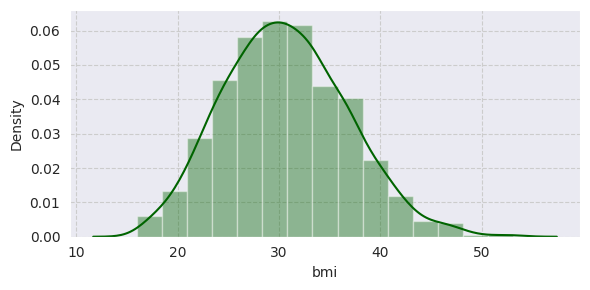

In [11]:
plt.figure(figsize=(6,3))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(insurance_df['bmi'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

## Bivariate Analysis: 
Here we exploring relationships between pairs of variables to identify correlations, associations, or dependencies.

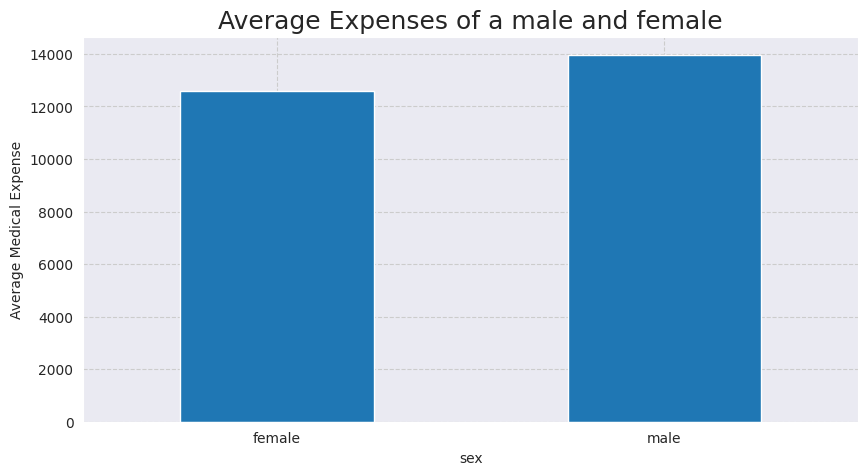

In [12]:
plt.figure(figsize=(10,5))
insurance_df.groupby(['sex'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of a male and female",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

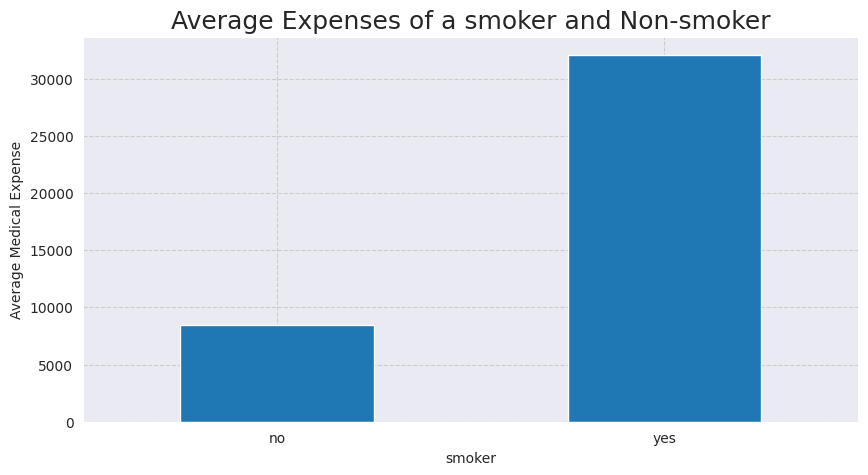

In [13]:
# Medical Expenses of smoker and non-smoker
plt.figure(figsize=(10,5))
insurance_df.groupby(['smoker'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses of a smoker and Non-smoker",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

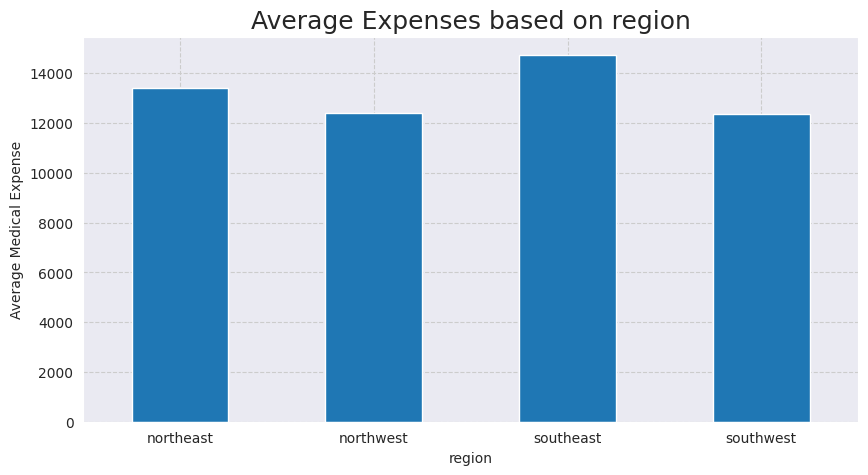

In [14]:
plt.figure(figsize=(10,5))
insurance_df.groupby(['region'])['expenses'].mean().plot.bar()
plt.ylabel('Average Medical Expense')
plt.title("Average Expenses based on region",fontsize=18)
plt.xticks(rotation = 0)
plt.show()

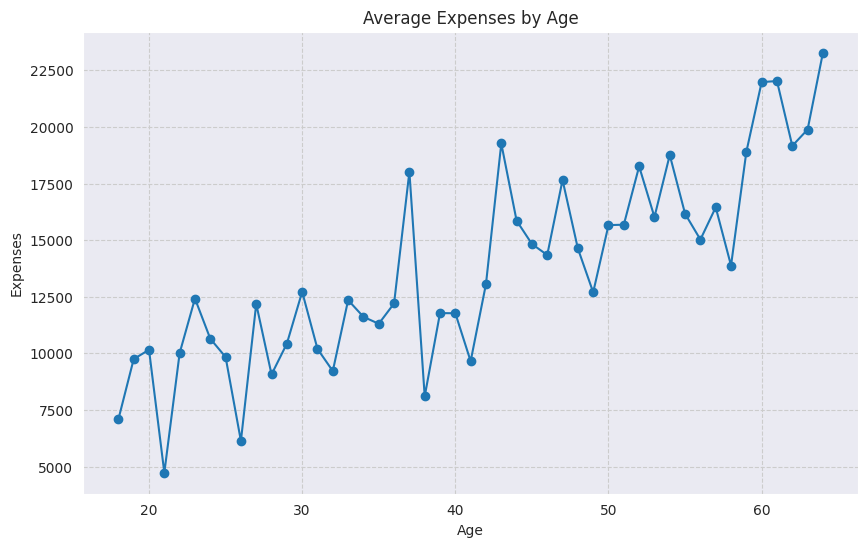

In [15]:
# Calculate the average expenses for each age group
average_expenses_by_age = insurance_df.groupby('age')['expenses'].mean()

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(average_expenses_by_age.index, average_expenses_by_age.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Expenses')
plt.title('Average Expenses by Age')
plt.grid(True)
plt.show()

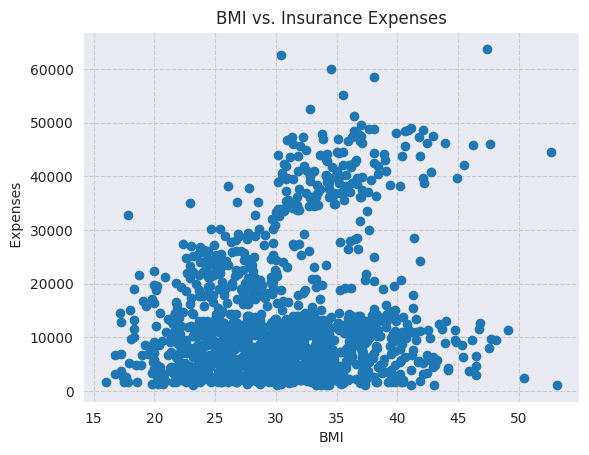

In [16]:
# Create scatter plot for bmi and expenses
plt.scatter(insurance_df["bmi"], insurance_df["expenses"])

plt.xlabel('BMI')
plt.ylabel(' Expenses')
plt.title('BMI vs. Insurance Expenses')
plt.show()

## Multivariate Analysis
Here we analysis two variables with the target variable Expences.

<Axes: xlabel='bmi', ylabel='expenses'>

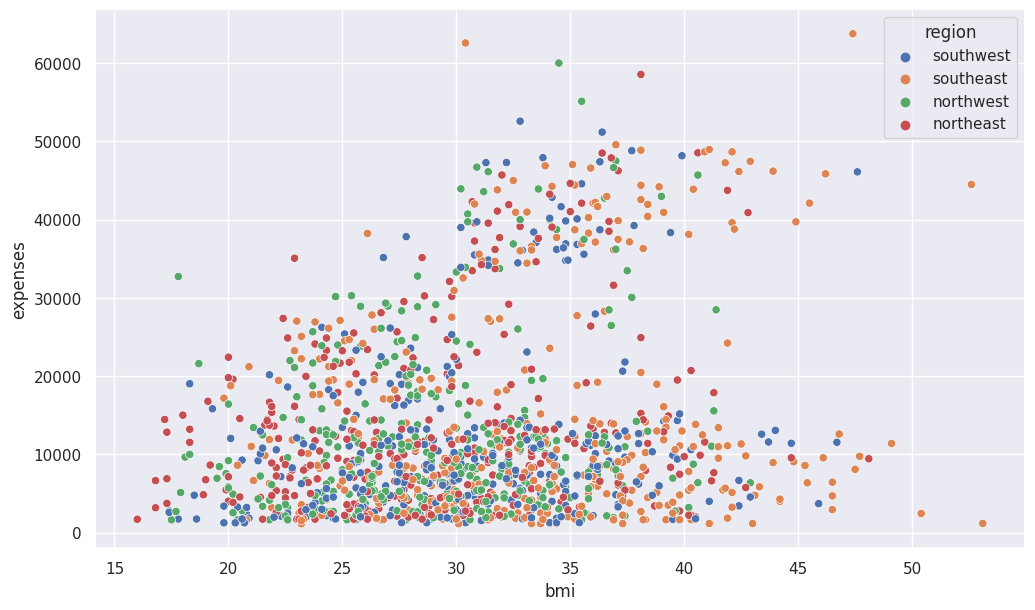

In [17]:
sns.set(rc={"figure.figsize":(12, 7)})
sns.scatterplot(data=insurance_df, x="bmi", y="expenses", hue="region")


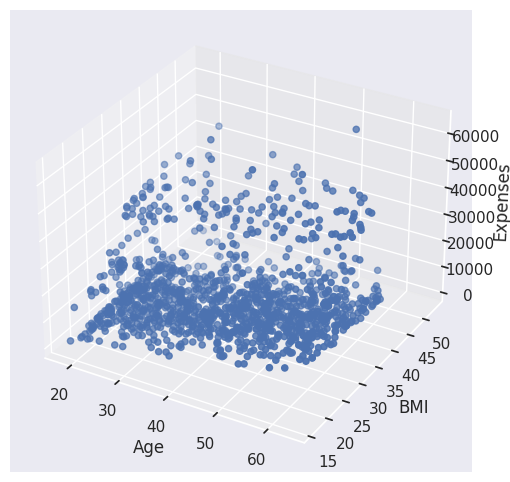

In [18]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(insurance_df['age'], insurance_df['bmi'], insurance_df['expenses'])
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Expenses')
plt.show()

## 3- Feature engineering

In the 'sex' and 'smoker' columns  in the DataFrame 'df' we have categorical values whilest for machine learning algorithm we need numerical values, therefore, here we apply Lable incoding to convert categorical values to numeric. 

In [19]:
insurance_df.head(1)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92


In [20]:

# Perform one-hot encoding
insurance_df = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'])




In [42]:
insurance_df.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,1,0,0,1,0,0,0,1
1,18,33.8,1,1725.55,0,1,1,0,0,0,1,0
2,28,33.0,3,4449.46,0,1,1,0,0,0,1,0
3,33,22.7,0,21984.47,0,1,1,0,0,1,0,0
4,32,28.9,0,3866.86,0,1,1,0,0,1,0,0


## Model training and Prediction

In [23]:
X = insurance_df.drop("expenses",axis = 1)
y = insurance_df.expenses

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

In [25]:
#Linear regresion
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [26]:
#Decisionn tree
decision_tree = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree.fit(X_train, y_train)
y_pred_decisiontree = decision_tree.predict(X_test)

In [27]:
#Random forest

random_forest = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [28]:
# Calculate evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_decisiontree = mean_squared_error(y_test, y_pred_decisiontree)
mse_rf = mean_squared_error(y_test, y_pred_rf)


In [29]:
r2_lr = r2_score(y_test, y_pred_lr)
r2_decisiontree = r2_score(y_test, y_pred_decisiontree)
r2_rf = r2_score(y_test, y_pred_rf)

# Create a table to display the results
results = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R2 Score': [r2_lr, r2_decisiontree, r2_rf]
})

# Print the table
print(tabulate(results, headers='keys', tablefmt='psql'))

+----+-------------------+------------+
|    | Algorithm         |   R2 Score |
|----+-------------------+------------|
|  0 | Linear Regression |   0.800018 |
|  1 | Decision Tree     |   0.842686 |
|  2 | Random Forest     |   0.895847 |
+----+-------------------+------------+


In [55]:
import joblib

# Save the Random Forest model
joblib.dump(random_forest, 'best_random_forest_model.pkl')
model = joblib.load('best_random_forest_model.pkl')

